In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape, test.shape

((318438, 18), (137057, 17))

In [4]:
df = pd.concat([train, test], axis=0)

In [5]:
df.shape

(455495, 18)

In [6]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
df.info()
#we have 9 catogorical features and 9 integeres (float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available Extra Rooms in Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed Grade                          455347 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4488

In [8]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,455495.00000,455495.000000,455495.000000,455495.000000,455347.000000,455495.000000,448806.000000,455495.000000,455495.000000
mean,227748.00000,18.326335,4.767798,3.196140,2.628420,65786.793563,7.249495,3.284229,4877.434022
std,131490.22477,8.634036,3.102450,1.166994,0.871997,37968.830850,4.758941,1.768044,1084.982089
min,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,113874.50000,11.000000,2.000000,2.000000,2.000000,32874.000000,4.000000,2.000000,4184.000000
50%,227748.00000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4738.000000
75%,341621.50000,26.000000,7.000000,4.000000,3.000000,98576.500000,8.000000,4.000000,5405.000000
max,455495.00000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11920.000000


In [9]:
df.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [10]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))

In [11]:
data_info(df)

1) Number of columns are :  18
2) Number of rows are :  455495
3) Total number of data-points : 8198910
4) Count of Numerical Features : 9
5) Count of Categorical Features : 9


In [12]:
def features_with_missing_values(data):
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')

In [13]:
features_with_missing_values(train)

The Feature  Bed Grade  has 113 missing values
The Feature  City_Code_Patient  has 4532 missing values


In [14]:
features_with_missing_values(test)

The Feature  Bed Grade  has 35 missing values
The Feature  City_Code_Patient  has 2157 missing values


<AxesSubplot:xlabel='Stay', ylabel='Department'>

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


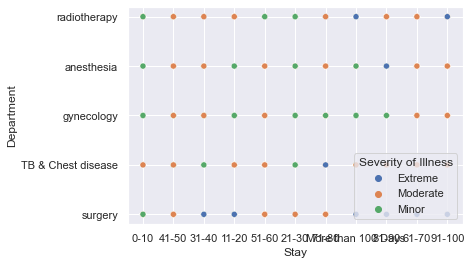

In [15]:
sns.set()
sns.scatterplot(x="Stay",y="Department", hue = 'Severity of Illness', data=df)

In [16]:
features_with_nul_values = ['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']
for feature in features_with_nul_values:
    print(feature + ' Unique values:',len(df[feature].unique()))
    print(df[feature].value_counts())

case_id Unique values: 455495
2047      1
429179    1
402542    1
404591    1
447600    1
         ..
234279    1
256808    1
254761    1
260906    1
2049      1
Name: case_id, Length: 455495, dtype: int64
Hospital_code Unique values: 32
26    47523
23    38220
19    30036
6     29221
11    24827
14    24715
28    24572
27    20243
9     16360
12    16170
29    16158
32    15252
25    14046
10    13538
15    13326
21    11784
24    11467
3     10277
17     7844
1      7460
5      7448
13     7432
2      7277
30     7215
22     6006
31     5740
8      5284
16     5244
18     5228
20     1962
7      1871
4      1749
Name: Hospital_code, dtype: int64
Hospital_type_code Unique values: 7
a    204730
b     98884
c     66147
e     35428
d     29048
f     15252
g      6006
Name: Hospital_type_code, dtype: int64
City_Code_Hospital Unique values: 11
1     79058
2     74312
6     67441
7     50279
3     45544
5     44395
9     37428
11    24572
4     19778
10     7460
13     5228
Name: City_Code_

In [17]:
corrmap = df.corr()

In [18]:
corrmap

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.024139,-0.008247,0.023878,0.011755,-0.000235,0.038053,0.000818,-0.029820
Hospital_code,-0.024139,1.000000,0.127760,-0.058744,-0.015001,0.002912,-0.015260,-0.028168,0.046347
City_Code_Hospital,-0.008247,0.127760,1.000000,-0.045313,-0.048423,0.001617,-0.025153,0.018377,-0.034767
Available Extra Rooms in Hospital,0.023878,-0.058744,-0.045313,1.000000,-0.115303,0.001551,-0.008715,0.095790,-0.143479
Bed Grade,0.011755,-0.015001,-0.048423,-0.115303,1.000000,0.000579,-0.007052,0.089361,0.071705
patientid,-0.000235,0.002912,0.001617,0.001551,0.000579,1.000000,0.000979,0.002865,0.000033
City_Code_Patient,0.038053,-0.015260,-0.025153,-0.008715,-0.007052,0.000979,1.000000,-0.012611,0.025665
Visitors with Patient,0.000818,-0.028168,0.018377,0.095790,0.089361,0.002865,-0.012611,1.000000,-0.150008
Admission_Deposit,-0.029820,0.046347,-0.034767,-0.143479,0.071705,0.000033,0.025665,-0.150008,1.000000


In [19]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [20]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [21]:
hospital_type_map={
 'a': 0,
 'b': 1,
 'c': 2,
 'e': 3,
 'd': 4,
 'f': 5,
 'g': 6} 

hospital_region_map = {'X': 0, 'Y': 1, 'Z': 2}

dep_map={'gynecology': 0,
 'anesthesia': 1,
 'radiotherapy': 2,
 'TB & Chest disease': 3,
 'surgery': 4}

ward_type_map ={'R': 0, 'Q': 1, 'S': 2, 'P': 3, 'T': 4, 'U': 5}
ward_fac_map ={'F':0, 'E': 1, 'D':2, 'C': 3, 'B': 4, 'A': 5}
admiss_map = {'Trauma': 0, 'Emergency': 1, 'Urgent': 2}
stay_map = {'21-30': 2,
 '11-20': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 'More than 100 Days': 10,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}

In [22]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [23]:
df['Hospital_type_code'] = df['Hospital_type_code'].map(hospital_type_map)
df['Hospital_region_code'] = df['Hospital_region_code'].map(hospital_region_map)
df['Department'] = df['Department'].map(dep_map)
df['Ward_Type'] = df['Ward_Type'].map(ward_type_map)
df['Ward_Facility_Code'] = df['Ward_Facility_Code'].map(ward_fac_map)
df['Type of Admission'] = df['Type of Admission'].map(admiss_map)
df['Stay'] = df['Stay'].map(stay_map)

In [24]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,2,0,0,2.0,31397,7.0,1,Extreme,2,51-60,4911.0,0.0
1,2,2,2,5,2,2,2,2,0,2.0,31397,7.0,0,Extreme,2,51-60,5954.0,4.0
2,3,10,3,1,0,2,1,2,1,2.0,31397,7.0,0,Extreme,2,51-60,4745.0,3.0
3,4,26,1,2,1,2,2,0,2,2.0,31397,7.0,0,Extreme,2,51-60,7272.0,4.0
4,5,26,1,2,1,2,2,2,2,2.0,31397,7.0,0,Extreme,2,51-60,5558.0,4.0


In [25]:
df.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [26]:
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace = True)
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)

In [27]:
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [28]:
test['Stay'] = -1
df = pd.concat([train, test])
df.shape

(455495, 18)

In [29]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [30]:
from sklearn.preprocessing import LabelEncoder

for i in ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype('str'))

In [31]:
train = df[df['Stay']!=-1]
test = df[df['Stay']==-1]

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  int32  
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  int32  
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  int32  
 7   Ward_Type                          318438 non-null  int32  
 8   Ward_Facility_Code                 318438 non-null  int32  
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [33]:
le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'].astype('str'))

<ipython-input-33-5cfbca4321f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Stay'] = le.fit_transform(train['Stay'].astype('str'))


In [34]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [35]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,318439,21,2,3,2,3,2,3,0,2.0,17006,2.0,0,2,2,7,3095.0,-1
1,318440,29,0,4,0,2,2,3,5,2.0,17006,2.0,1,2,4,7,4018.0,-1
2,318441,26,1,2,1,3,2,1,3,4.0,17006,2.0,0,2,3,7,4492.0,-1
3,318442,6,0,6,0,3,2,1,5,2.0,17006,2.0,1,2,3,7,4173.0,-1
4,318443,28,1,11,0,2,2,2,5,2.0,17006,2.0,1,2,4,7,4161.0,-1


In [36]:
test = test.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train = train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [55]:
from sklearn.model_selection import train_test_split #Spliting method
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, BaggingClassifier, VotingClassifier#Ensemble models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int32  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  int32  
 5   Ward_Type                          318438 non-null  int32  
 6   Bed Grade                          318438 non-null  float64
 7   City_Code_Patient                  318438 non-null  float64
 8   Type of Admission                  318438 non-null  int32  
 9   Severity of Illness                318438 non-null  int32  
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

In [48]:
X = train.drop('Stay', axis =1)
y = train['Stay']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify = y)

In [53]:
X_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
226266,17,4,1,3,3,2,4.0,8.0,1,2,3,5,4793.0
47614,20,1,2,2,3,3,3.0,9.0,1,0,2,3,4713.0
245583,25,4,1,2,2,3,3.0,1.0,1,0,6,4,3746.0
189299,5,0,1,2,2,2,2.0,8.0,1,2,2,5,5087.0
227155,13,0,5,3,2,2,2.0,7.0,1,2,2,3,5541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22626,26,1,2,2,1,3,4.0,7.0,2,2,2,7,4636.0
96357,11,1,2,5,2,1,2.0,8.0,1,0,4,5,4101.0
103972,26,1,2,2,2,1,2.0,8.0,1,2,4,4,5385.0
276173,3,2,3,2,2,2,4.0,5.0,0,1,2,7,6407.0


In [57]:
sc = StandardScaler()
sc.fit_transform(X_train)

array([[-0.15339419,  1.78687329, -1.21683096, ..., -0.16000482,
         0.46118759, -0.08227564],
       [ 0.19371297, -0.16719118, -0.89434556, ..., -0.72678007,
        -0.59668569, -0.15576779],
       [ 0.7722249 ,  1.78687329, -1.21683096, ...,  1.54032095,
        -0.06774905, -1.0441042 ],
       ...,
       [ 0.88792729, -0.16719118, -0.89434556, ...,  0.40677044,
        -0.06774905,  0.4615663 ],
       [-1.77322759,  0.48416364, -0.57186016, ..., -0.72678007,
         1.51906086,  1.40042857],
       [ 0.54082013, -0.81854601,  0.39559603, ..., -0.16000482,
         1.51906086, -0.32571839]])

In [58]:
sc.transform(X_test)

array([[ 0.54082013, -0.81854601,  0.39559603, ...,  0.40677044,
        -1.65455896, -0.69960973],
       [ 0.88792729, -0.16719118, -0.89434556, ..., -0.72678007,
        -1.12562232,  0.03255586],
       [ 0.07801058, -0.81854601,  0.71808143, ...,  0.40677044,
        -0.59668569, -1.0211379 ],
       ...,
       [-1.42612044, -0.81854601,  0.39559603, ...,  0.40677044,
         0.99012422,  1.24333909],
       [ 0.30941536,  0.48416364, -0.57186016, ...,  0.40677044,
         0.46118759,  0.32744312],
       [ 0.07801058, -0.81854601,  0.71808143, ...,  0.40677044,
        -0.59668569, -0.15393049]])

In [59]:
y_train

226266    4
47614     1
245583    5
189299    3
227155    2
         ..
22626     1
96357     2
103972    7
276173    3
149982    2
Name: Stay, Length: 222906, dtype: int32

In [60]:
y_test

47823     2
6930      3
114101    2
240776    2
88591     7
         ..
62219     2
67306     2
245061    0
78385     1
117692    0
Name: Stay, Length: 95532, dtype: int32

In [61]:
def metrics(model, X_train, X_test, y_true, y_pred):
    print('Confusion Matrix \n', confusion_matrix(y_true, y_pred))
    print('Accuracy Score \n', accuracy_score(y_true, y_pred))
    print('Classification Report \n', classification_report(y_true, y_pred))
    
def predictions(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, evaluation = True, full = False):
    if evaluation:
        model.fit(X_train, y_train)
    
        train_pred = model.predict(X_train)
    
        test_pred = model.predict(X_test)
    
        actual = [y_train, y_test]
    
        pred = [train_pred, test_pred]
    
        data = ['Train', 'Test']
    
        for i in range(2):
        
            print(data[i],'\n')
        
            metrics(model, X_train,  X_test, actual[i], pred[i])
    if full:
        model.fit(X, y)
        pred_data = model.predict(X_predict)
        #return pred_data
        
        sample_df['Stay'] = pd.Series(pred_data).map(reverse_target_map)
        sample_df.to_csv(str(model)[:10]+'.csv', index = None)

In [62]:
lr = LogisticRegression(max_iter=500)

In [63]:
predictions(lr)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train 

Confusion Matrix 
 [[   28  5576  9018  1699     0   202     0     0     0     0     0]
 [   27 18909 29733  4685     0  1343     0     0     0     0     0]
 [   15 16298 40561  3271     0  1099     0     0     0     0     0]
 [   39  8500 16710  9229     0  4133     0     0     0     0     0]
 [    5  1668  5050  1023     0   473     0     0     0     0     1]
 [   22  3764  5038  9852     0  5835     0     0     0     0     1]
 [    3   294   985   388     0   251     0     0     0     0     0]
 [    6   942  1267  2998     0  1965     0     0     0     0     0]
 [    2   229   202  1263     0  1691     0     0     0     0     0]
 [    1   236   330   792     0   576     0     0     0     0     0]
 [    0   277   434  1207     0  2760     0     0     0     0     0]]
Accuracy Score 
 0.33449974428682944


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

Classification Report 
               precision    recall  f1-score   support

           0       0.19      0.00      0.00     16523
           1       0.33      0.35      0.34     54697
           2       0.37      0.66      0.48     61244
           3       0.25      0.24      0.25     38611
           4       0.00      0.00      0.00      8220
           5       0.29      0.24      0.26     24512
           6       0.00      0.00      0.00      1921
           7       0.00      0.00      0.00      7178
           8       0.00      0.00      0.00      3387
           9       0.00      0.00      0.00      1935
          10       0.00      0.00      0.00      4678

    accuracy                           0.33    222906
   macro avg       0.13      0.14      0.12    222906
weighted avg       0.27      0.33      0.29    222906

Test 

Confusion Matrix 
 [[   21  2382  3865   722     0    91     0     0     0     0     0]
 [   16  8081 12767  2003     0   574     0     0     0     0     1]

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
predictions(dc)

Train 

Confusion Matrix 
 [[16523     0     0     0     0     0     0     0     0     0     0]
 [    8 54689     0     0     0     0     0     0     0     0     0]
 [    3    20 61221     0     0     0     0     0     0     0     0]
 [    0     9    11 38591     0     0     0     0     0     0     0]
 [    1     2     1     2  8214     0     0     0     0     0     0]
 [    0     2     4     3     2 24501     0     0     0     0     0]
 [    0     0     1     0     0     0  1920     0     0     0     0]
 [    0     0     1     0     1     0     0  7176     0     0     0]
 [    0     0     0     1     0     0     0     0  3386     0     0]
 [    0     0     0     0     0     0     0     0     0  1935     0]
 [    0     0     0     0     0     0     0     0     0     0  4678]]
Accuracy Score 
 0.9996769938898011
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16523
           1       1.00      1.00      1.00 

In [68]:
rf = RandomForestClassifier()
predictions(rf)

Train 

Confusion Matrix 
 [[16518     3     2     0     0     0     0     0     0     0     0]
 [    5 54680     8     4     0     0     0     0     0     0     0]
 [    1    11 61226     6     0     0     0     0     0     0     0]
 [    0     5     7 38595     2     2     0     0     0     0     0]
 [    1     2     1     0  8214     2     0     0     0     0     0]
 [    0     2     4     1     0 24505     0     0     0     0     0]
 [    0     0     1     0     0     0  1920     0     0     0     0]
 [    0     0     1     0     1     0     0  7176     0     0     0]
 [    0     0     0     1     0     0     0     0  3386     0     0]
 [    0     0     0     0     0     0     0     0     0  1935     0]
 [    0     0     0     0     0     0     0     0     0     0  4678]]
Accuracy Score 
 0.9996725076938261
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16523
           1       1.00      1.00      1.00 

In [69]:
ada = AdaBoostClassifier()

predictions(ada)

Train 

Confusion Matrix 
 [[ 1566  7835  6621   475     3    22     0     0     0     0     1]
 [ 2440 21921 24527  3823     0  1858     0     1    70     1    56]
 [ 2367 15947 38177  3746     1   820     0     3    67     1   115]
 [  971  7333 14660  8714     3  6463     0     1   191     3   272]
 [  372  1754  4527   892     1   543     0     0    51     0    80]
 [  219  2434  3739  7230     0  9891     0     1   323     1   674]
 [   75   305   895   240     0   291     0     0    35     0    80]
 [   54   618   765  2168     1  2868     0     0   174     1   529]
 [   17   143   180   269     0  2164     0     2   155     0   457]
 [   17   141   199   566     0   726     0     0    47     0   239]
 [   14   229   304   400     0  1864     0     1   205     0  1661]]
Accuracy Score 
 0.36825388280261634


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

Classification Report 
               precision    recall  f1-score   support

           0       0.19      0.09      0.13     16523
           1       0.37      0.40      0.39     54697
           2       0.40      0.62      0.49     61244
           3       0.31      0.23      0.26     38611
           4       0.11      0.00      0.00      8220
           5       0.36      0.40      0.38     24512
           6       0.00      0.00      0.00      1921
           7       0.00      0.00      0.00      7178
           8       0.12      0.05      0.07      3387
           9       0.00      0.00      0.00      1935
          10       0.40      0.36      0.38      4678

    accuracy                           0.37    222906
   macro avg       0.21      0.20      0.19    222906
weighted avg       0.32      0.37      0.33    222906

Test 

Confusion Matrix 
 [[  686  3296  2880   201     4    14     0     0     0     0     0]
 [ 1147  9278 10451  1672     0   837     0     0    31     0    26]

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
cat = CatBoostClassifier()
predictions(cat)

Learning rate set to 0.10425
0:	learn: 2.2208974	total: 897ms	remaining: 14m 56s
1:	learn: 2.1037604	total: 1.37s	remaining: 11m 25s
2:	learn: 2.0171013	total: 1.88s	remaining: 10m 25s
3:	learn: 1.9509463	total: 2.29s	remaining: 9m 30s
4:	learn: 1.8963469	total: 2.73s	remaining: 9m 2s
5:	learn: 1.8524397	total: 3.32s	remaining: 9m 10s
6:	learn: 1.8133841	total: 3.77s	remaining: 8m 54s
7:	learn: 1.7800258	total: 4.44s	remaining: 9m 10s
8:	learn: 1.7534457	total: 5.09s	remaining: 9m 21s
9:	learn: 1.7297097	total: 5.69s	remaining: 9m 23s
10:	learn: 1.7099844	total: 6.23s	remaining: 9m 20s
11:	learn: 1.6927021	total: 6.69s	remaining: 9m 10s
12:	learn: 1.6791143	total: 7.18s	remaining: 9m 5s
13:	learn: 1.6668072	total: 7.64s	remaining: 8m 58s
14:	learn: 1.6542521	total: 8.18s	remaining: 8m 57s
15:	learn: 1.6446766	total: 8.68s	remaining: 8m 53s
16:	learn: 1.6366069	total: 9.14s	remaining: 8m 48s
17:	learn: 1.6283739	total: 9.63s	remaining: 8m 45s
18:	learn: 1.6210326	total: 10.2s	remaining:

157:	learn: 1.5018434	total: 1m 12s	remaining: 6m 28s
158:	learn: 1.5015862	total: 1m 13s	remaining: 6m 28s
159:	learn: 1.5011593	total: 1m 13s	remaining: 6m 27s
160:	learn: 1.5007052	total: 1m 14s	remaining: 6m 26s
161:	learn: 1.5005433	total: 1m 14s	remaining: 6m 26s
162:	learn: 1.5002868	total: 1m 15s	remaining: 6m 25s
163:	learn: 1.5001309	total: 1m 15s	remaining: 6m 25s
164:	learn: 1.5000307	total: 1m 15s	remaining: 6m 24s
165:	learn: 1.4998475	total: 1m 16s	remaining: 6m 23s
166:	learn: 1.4996625	total: 1m 16s	remaining: 6m 23s
167:	learn: 1.4993195	total: 1m 17s	remaining: 6m 22s
168:	learn: 1.4988475	total: 1m 17s	remaining: 6m 22s
169:	learn: 1.4987017	total: 1m 18s	remaining: 6m 21s
170:	learn: 1.4985045	total: 1m 18s	remaining: 6m 20s
171:	learn: 1.4982167	total: 1m 18s	remaining: 6m 20s
172:	learn: 1.4980411	total: 1m 19s	remaining: 6m 19s
173:	learn: 1.4978166	total: 1m 19s	remaining: 6m 19s
174:	learn: 1.4975385	total: 1m 20s	remaining: 6m 18s
175:	learn: 1.4973617	total:

310:	learn: 1.4728423	total: 2m 20s	remaining: 5m 11s
311:	learn: 1.4727724	total: 2m 21s	remaining: 5m 10s
312:	learn: 1.4726934	total: 2m 21s	remaining: 5m 10s
313:	learn: 1.4726344	total: 2m 21s	remaining: 5m 10s
314:	learn: 1.4725428	total: 2m 22s	remaining: 5m 9s
315:	learn: 1.4723726	total: 2m 22s	remaining: 5m 9s
316:	learn: 1.4722915	total: 2m 23s	remaining: 5m 8s
317:	learn: 1.4721854	total: 2m 23s	remaining: 5m 8s
318:	learn: 1.4720490	total: 2m 24s	remaining: 5m 7s
319:	learn: 1.4719957	total: 2m 24s	remaining: 5m 7s
320:	learn: 1.4718681	total: 2m 24s	remaining: 5m 6s
321:	learn: 1.4717262	total: 2m 25s	remaining: 5m 6s
322:	learn: 1.4716203	total: 2m 25s	remaining: 5m 5s
323:	learn: 1.4714046	total: 2m 26s	remaining: 5m 5s
324:	learn: 1.4713049	total: 2m 26s	remaining: 5m 4s
325:	learn: 1.4711367	total: 2m 27s	remaining: 5m 4s
326:	learn: 1.4709753	total: 2m 27s	remaining: 5m 3s
327:	learn: 1.4708713	total: 2m 27s	remaining: 5m 3s
328:	learn: 1.4707220	total: 2m 28s	remain

463:	learn: 1.4537717	total: 3m 30s	remaining: 4m 2s
464:	learn: 1.4536964	total: 3m 30s	remaining: 4m 2s
465:	learn: 1.4535424	total: 3m 30s	remaining: 4m 1s
466:	learn: 1.4534726	total: 3m 31s	remaining: 4m 1s
467:	learn: 1.4533931	total: 3m 31s	remaining: 4m
468:	learn: 1.4532729	total: 3m 32s	remaining: 4m
469:	learn: 1.4531018	total: 3m 32s	remaining: 3m 59s
470:	learn: 1.4529397	total: 3m 33s	remaining: 3m 59s
471:	learn: 1.4528727	total: 3m 33s	remaining: 3m 59s
472:	learn: 1.4527385	total: 3m 34s	remaining: 3m 58s
473:	learn: 1.4526502	total: 3m 34s	remaining: 3m 58s
474:	learn: 1.4525877	total: 3m 34s	remaining: 3m 57s
475:	learn: 1.4524583	total: 3m 35s	remaining: 3m 57s
476:	learn: 1.4523560	total: 3m 35s	remaining: 3m 56s
477:	learn: 1.4521634	total: 3m 36s	remaining: 3m 56s
478:	learn: 1.4520517	total: 3m 36s	remaining: 3m 55s
479:	learn: 1.4519255	total: 3m 37s	remaining: 3m 55s
480:	learn: 1.4517982	total: 3m 37s	remaining: 3m 54s
481:	learn: 1.4516153	total: 3m 38s	rema

616:	learn: 1.4366502	total: 4m 48s	remaining: 2m 59s
617:	learn: 1.4365386	total: 4m 49s	remaining: 2m 58s
618:	learn: 1.4364444	total: 4m 49s	remaining: 2m 58s
619:	learn: 1.4363919	total: 4m 50s	remaining: 2m 57s
620:	learn: 1.4363202	total: 4m 50s	remaining: 2m 57s
621:	learn: 1.4361970	total: 4m 51s	remaining: 2m 56s
622:	learn: 1.4361118	total: 4m 51s	remaining: 2m 56s
623:	learn: 1.4360594	total: 4m 51s	remaining: 2m 55s
624:	learn: 1.4359019	total: 4m 52s	remaining: 2m 55s
625:	learn: 1.4358045	total: 4m 52s	remaining: 2m 54s
626:	learn: 1.4356616	total: 4m 53s	remaining: 2m 54s
627:	learn: 1.4355622	total: 4m 53s	remaining: 2m 54s
628:	learn: 1.4354317	total: 4m 54s	remaining: 2m 53s
629:	learn: 1.4353745	total: 4m 54s	remaining: 2m 53s
630:	learn: 1.4353052	total: 4m 55s	remaining: 2m 52s
631:	learn: 1.4352026	total: 4m 55s	remaining: 2m 52s
632:	learn: 1.4350495	total: 4m 55s	remaining: 2m 51s
633:	learn: 1.4349649	total: 4m 56s	remaining: 2m 51s
634:	learn: 1.4347986	total:

770:	learn: 1.4213799	total: 6m 4s	remaining: 1m 48s
771:	learn: 1.4212963	total: 6m 4s	remaining: 1m 47s
772:	learn: 1.4212122	total: 6m 5s	remaining: 1m 47s
773:	learn: 1.4211402	total: 6m 5s	remaining: 1m 46s
774:	learn: 1.4210807	total: 6m 6s	remaining: 1m 46s
775:	learn: 1.4209451	total: 6m 6s	remaining: 1m 45s
776:	learn: 1.4208474	total: 6m 7s	remaining: 1m 45s
777:	learn: 1.4206974	total: 6m 7s	remaining: 1m 44s
778:	learn: 1.4205865	total: 6m 8s	remaining: 1m 44s
779:	learn: 1.4204890	total: 6m 8s	remaining: 1m 43s
780:	learn: 1.4203646	total: 6m 9s	remaining: 1m 43s
781:	learn: 1.4202432	total: 6m 9s	remaining: 1m 43s
782:	learn: 1.4201861	total: 6m 10s	remaining: 1m 42s
783:	learn: 1.4200504	total: 6m 10s	remaining: 1m 42s
784:	learn: 1.4199743	total: 6m 11s	remaining: 1m 41s
785:	learn: 1.4198863	total: 6m 11s	remaining: 1m 41s
786:	learn: 1.4197760	total: 6m 12s	remaining: 1m 40s
787:	learn: 1.4196745	total: 6m 12s	remaining: 1m 40s
788:	learn: 1.4195447	total: 6m 13s	rema

925:	learn: 1.4074161	total: 7m 18s	remaining: 35s
926:	learn: 1.4072689	total: 7m 18s	remaining: 34.6s
927:	learn: 1.4072272	total: 7m 19s	remaining: 34.1s
928:	learn: 1.4071690	total: 7m 19s	remaining: 33.6s
929:	learn: 1.4070417	total: 7m 20s	remaining: 33.1s
930:	learn: 1.4069342	total: 7m 20s	remaining: 32.7s
931:	learn: 1.4068763	total: 7m 21s	remaining: 32.2s
932:	learn: 1.4067732	total: 7m 21s	remaining: 31.7s
933:	learn: 1.4066880	total: 7m 21s	remaining: 31.2s
934:	learn: 1.4065763	total: 7m 22s	remaining: 30.8s
935:	learn: 1.4064598	total: 7m 22s	remaining: 30.3s
936:	learn: 1.4063986	total: 7m 23s	remaining: 29.8s
937:	learn: 1.4062443	total: 7m 23s	remaining: 29.3s
938:	learn: 1.4061526	total: 7m 24s	remaining: 28.9s
939:	learn: 1.4060696	total: 7m 24s	remaining: 28.4s
940:	learn: 1.4060192	total: 7m 25s	remaining: 27.9s
941:	learn: 1.4059585	total: 7m 25s	remaining: 27.4s
942:	learn: 1.4058623	total: 7m 25s	remaining: 27s
943:	learn: 1.4057652	total: 7m 26s	remaining: 26.

In [72]:
classifier=XGBClassifier()

In [73]:
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.4677891128996079

In [74]:
classifier.score(X_test,y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.42378470041452077

In [75]:
pred = classifier.predict(test.iloc[:,1:])
submissions = pd.DataFrame(pred, columns=['Stay'])
submissions['case_id'] = test['case_id']
submissions = submissions[['case_id', 'Stay']]

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [76]:
submissions

,case_id,Stay
0,318439,0
1,318440,5
2,318441,2
3,318442,2
4,318443,5
...,...,...
137052,455491,2
137053,455492,0
137054,455493,1
137055,455494,1


In [77]:
submissions['Stay'] = submissions['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})

In [88]:
submissions

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,21-30
137053,455492,0-10
137054,455493,11-20
137055,455494,11-20


In [82]:
submissions.to_csv('submissions.csv')

In [89]:
test.shape

(137057, 14)